---
# ML : Algorithme supervisé

### Importation des librairies

In [56]:
import seaborn as sns; sns.set()
from sklearn.neighbors import KNeighborsClassifier as KNN
import pandas as pd
import numpy as np

### Importation du dataset

In [57]:
iris = sns.load_dataset('iris')

### En-tête du dataset

In [58]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Infos sur la variable cible

In [59]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [60]:
iris['species'].nunique()

3

### Affichage d'un pairplot

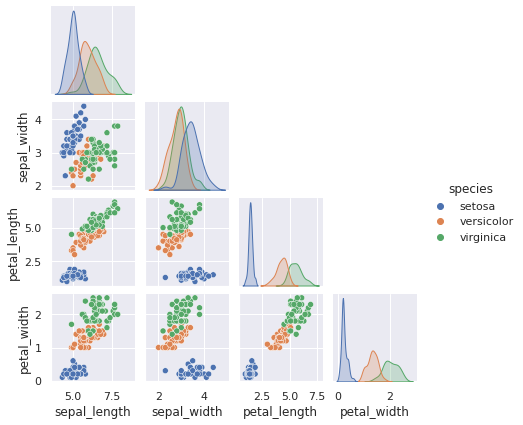

In [61]:
sns.pairplot(iris, hue="species", diag_kind="kde", height=1.5, corner=True)


### On convertit les classes en code numérique

In [62]:
Y = iris['species'].astype('category').cat.codes

### Dictionnaires pour convertir classe/code

In [63]:
vocab = iris['species'].astype('category').cat.categories
classe2index = { v:i for i, v in enumerate(vocab.tolist())}
index2classe = { i:v for i, v in enumerate(vocab.tolist())}

### Séparation des features (X) et de la target (Y)

In [64]:
X = iris.drop('species', axis="columns")

In [65]:
X.shape, Y.shape

((150, 4), (150,))

---
## K - Nearest neighbors

### Création de l'algorithme

In [66]:
knn = KNN(n_neighbors=3)
print(knn)

KNeighborsClassifier(n_neighbors=3)


### L'algo apprend les données

In [67]:
knn.fit(X, Y)

KNeighborsClassifier(n_neighbors=3)

### L'algorithme prédit pour chaque exemple

In [74]:
val = X.iloc[[41]]
knn.predict_proba(val)

array([[1., 0., 0.]])

### Créer une mesure de précision

In [69]:
def get_accuracy(preds, target):
    m = target.shape[0] # nombre d'exemples
    total_correct = (preds == target).sum()
    accuracy = total_correct / m
    return accuracy

### On vérifie l'accuracy de notre prédiction

In [70]:
predictions = knn.predict(X)
get_accuracy(predictions, Y)


0.96